In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
# Load the diabetes dataset 
df = pd.read_csv('diabetes.csv')


In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

I will go through the initial questions in order and add any additional notes 
<ins>EDA QUESTIONS</ins>

### Are there any missing values in the dataset?
Yes, there appear to be missing values as 0
Two dataframes are now going to be used. One retaining the dispersed 0 values
and the other keeping everything
### How are the predictor variables related to the outcome variable?
Predictor variables are not well correlated to the outcome variable individually. Glucose has the highest correlation 
As most patients with Glucose above 160 have diabetes and nearly all below 75 do not
### What is the correlation between the predictor variables?
- Pregnancies is correlated to age .68
- glucose is correlated to insulin .58
- skin thickness is correlated to BMI 0.66

### What is the distribution of each predictor variable?

left skewed or normally distributed with varying levels of kurtosis. Takeway is that having too many 0 outcomes is obscuring the relationships

### Are there any outliers in the predictor variables?
Yes, most predictor columns have outliers

### How are the predictor variables related to each other?

Some relationships, skin thickness and BMI

Age and Pregnancies

Insulin and Glucose

### Is there any interaction effect between the predictor variables?

- Yes, There are interaction affects between BMI, SKinThickness, Glucose, Insulin, and BloodPressure


### What is the average age of the individuals in the dataset?

About 32 for 0 outcome and 37 for 1 outcome


### What is the average glucose level for individuals with diabetes and without diabetes?

111 without and 145 with


### What is the average BMI for individuals with diabetes and without diabetes?

32 and 36

### How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

There are more observations without diabetes, most predictors are more weighted to the left either slightly or strongly

### Are there any differences in the predictor variables between males and females (if gender information is available)?

NO gender info is avaiable as far as I can see but there are many results of people who have had prenancies, so I this point I beleive that the data is represents all females



<ins>EDA EXTRA NOTES</ins>

- there are 500 negative and 268 positive outocomes

In [8]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Are there any missing values in the dataset?
As we see below there are no null values in the dataset

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [243]:
def iszero(data):
    return data == 0

In [246]:
iszero(df).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## But there are many zero values that likely could  be nulls 

- skin thickness should not be 0 presumably 
- insulin might be 0 for type 1 diabetes
- lots of pregnancies = 0 makes sense
- BMI == 0 does not makes sense


Doing analysis on 2 difference datasets

One with zeros and one with no zeros except preganacies

In [258]:
X_col_names=df.columns.values[:-1]

X_col_names

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [79]:
for col in X_col_names:
    zeros=df[df[col] == 0].shape[0]
    print(f"zero values in {col }:{zeros}")

zero values in Pregnancies:111
zero values in Glucose:5
zero values in BloodPressure:35
zero values in SkinThickness:227
zero values in Insulin:374
zero values in BMI:11
zero values in DiabetesPedigreeFunction:0
zero values in Age:0


### Below I will explore whether insulin == 0 is legit

If insulin is 0 then blood sugar should be high...
If insulin is 0 it should be very likely that the patient has diabetes


In [117]:
### distribution of outcomes for insulin == 0, should be highly correlated to 1
no_ins_df=df[df['Insulin'] == 0]
yes_ins_df=df[df['Insulin'] != 0]


print('Insulin == 0:')
print(no_ins_df.Outcome.value_counts())
print(f'Ratio: {no_ins_df.Outcome.value_counts()[1]/no_ins_df.Outcome.value_counts().sum()}')
print('Insulin != 0:')
print(yes_ins_df.Outcome.value_counts())
print(f'Ratio: {yes_ins_df.Outcome.value_counts()[1]/yes_ins_df.Outcome.value_counts().sum()}')

Insulin == 0:
0    236
1    138
Name: Outcome, dtype: int64
Ratio: 0.3689839572192513
Insulin != 0:
0    264
1    130
Name: Outcome, dtype: int64
Ratio: 0.3299492385786802


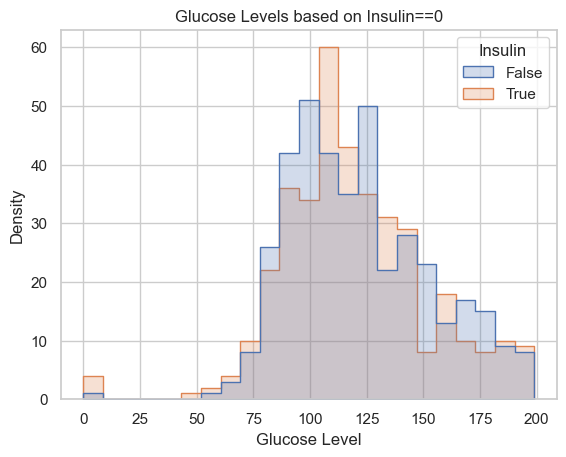

In [118]:
sns.set(style="whitegrid")


sns.histplot(data=df, x='Glucose', hue=df['Insulin']==0, element='step', common_norm=False)

# Adding labels and title
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.title('Glucose Levels based on Insulin==0')

# Display the plot
plt.show()


Having a 0 measurment only slighlty increase the chance of being positive. Which is suspicious. Could be worth dropping, but might keep and use a tree of some kind

In [120]:
print(no_ins_df.shape)

print(yes_ins_df.shape)

print('odd that the df is split into roughly half 0 and > 0')

(374, 9)
(394, 9)
odd that the df is split into roughly half 0 and > 0


### Solution to high amount of dispersed nulls is to seperate datasets into "full_df" which will have no zeros and df which will retain 0s and use ensemble model with trees to handle the zero values

# How are the predictor variables related to the outcome variable?

- Glucose has a small correlation of about 0.5 and the other columns are significantly less correlated 

### df

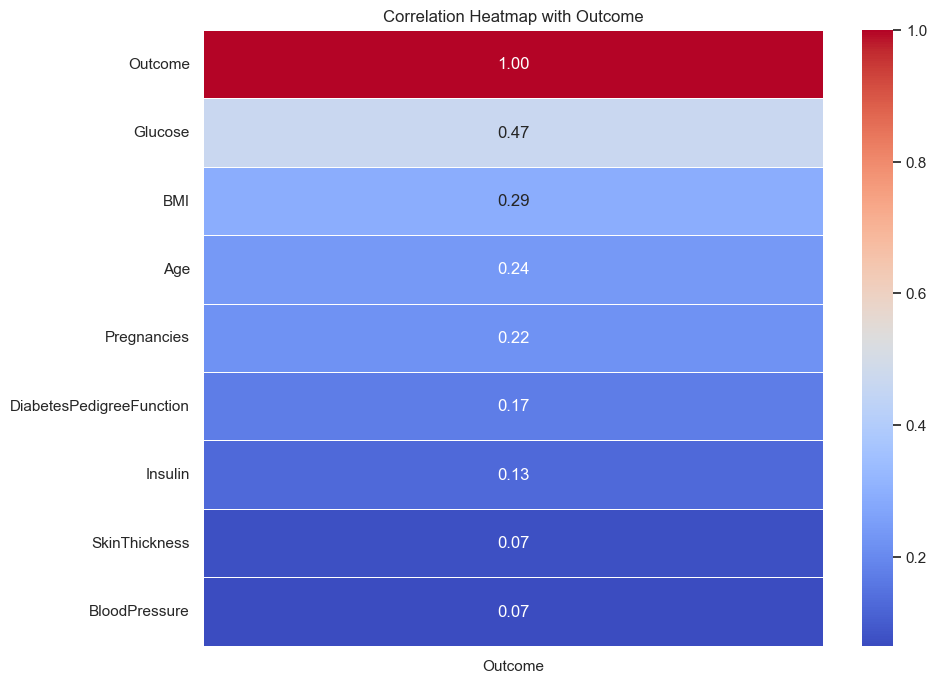

In [186]:
correlation_matrix = df.corr()['Outcome']

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  
sns.heatmap(data=correlation_matrix.sort_values(ascending = False).to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with Outcome')
plt.show()

In [181]:
correlation_matrix.sort_values(ascending 
                              = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### full_df, no zeros


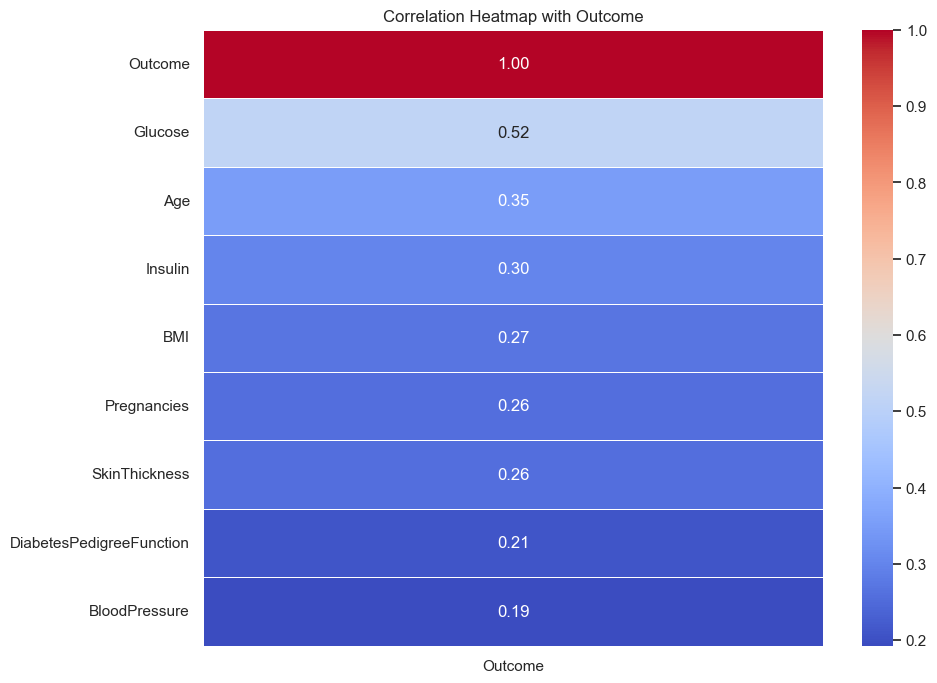

In [185]:
correlation_matrix = full_df.corr()['Outcome']

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  
sns.heatmap(data=correlation_matrix.sort_values(ascending = False).to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with Outcome')
plt.show()

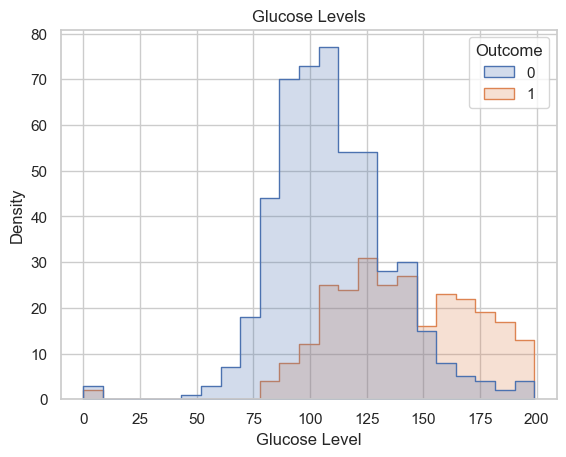

In [223]:
sns.set(style="whitegrid")


sns.histplot(data=df, x='Glucose', hue=df['Outcome'], element='step', common_norm=False)

# Adding labels and title
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.title('Glucose Levels')

# Display the plot
plt.show()

# What is the correlation between the predictor variables?

- Pregnancies is correlated to age .68
- glucose is correlated to insulin .58
- skin thickness is correlated to BMI 0.66

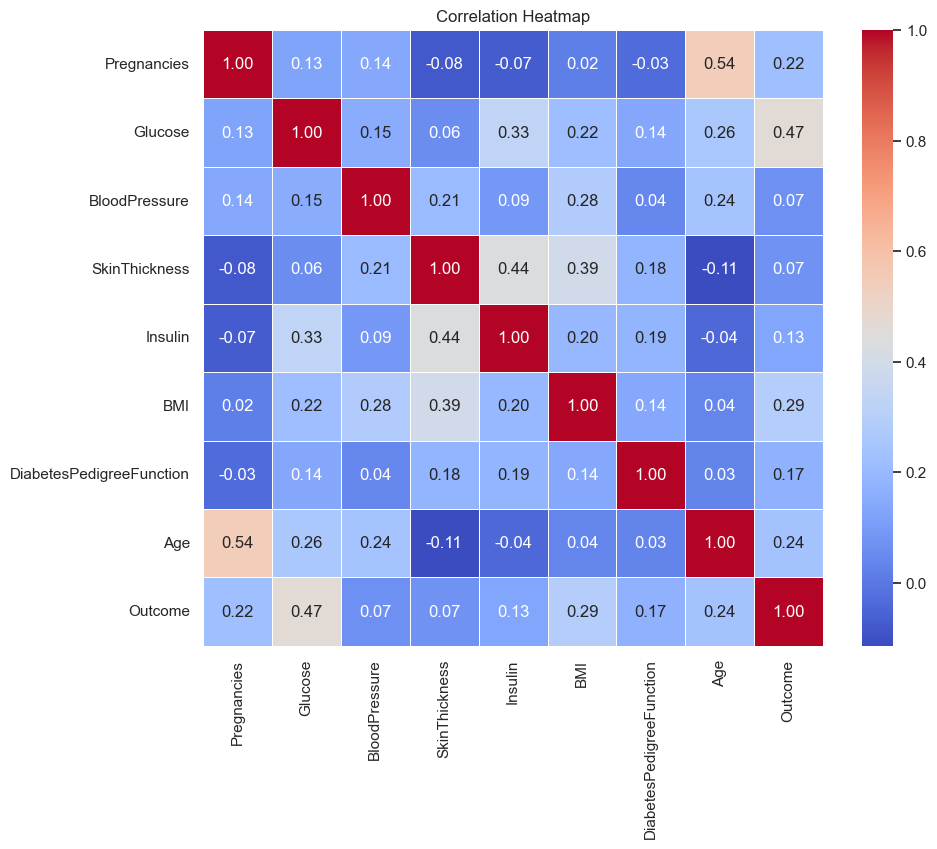

In [189]:
correlation_matrix = df.corr()

# Create a heatmap 
plt.figure(figsize=(10, 8))  
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

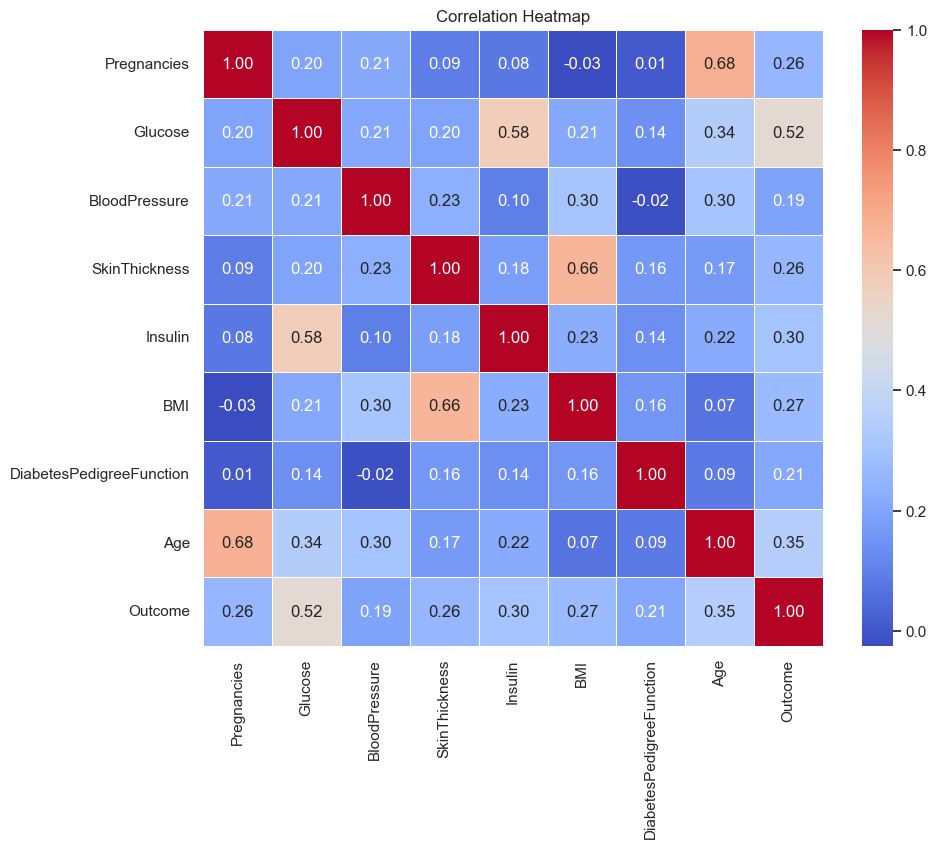

In [156]:
correlation_matrix = full_df.corr()

# Create a heatmap 
plt.figure(figsize=(10, 8))  
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# What is the distribution of each predictor variable

'Pregnancies' Are left skewed, Pregnancies decreased the relative count of 0 Outcomes
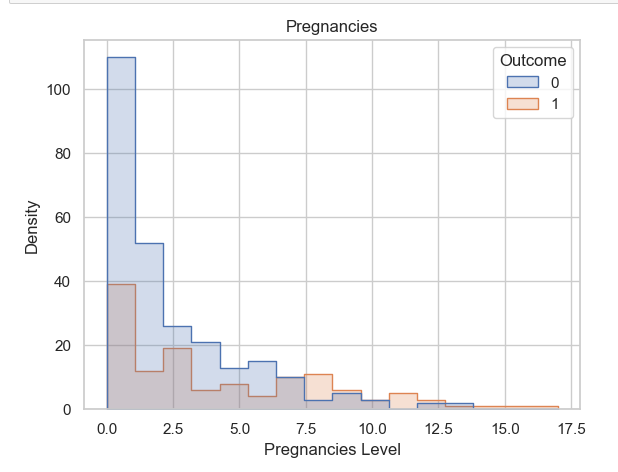

'Glucose' Are normally distributed, increasing glucose strongly decreases the relative count of 0 outcomes
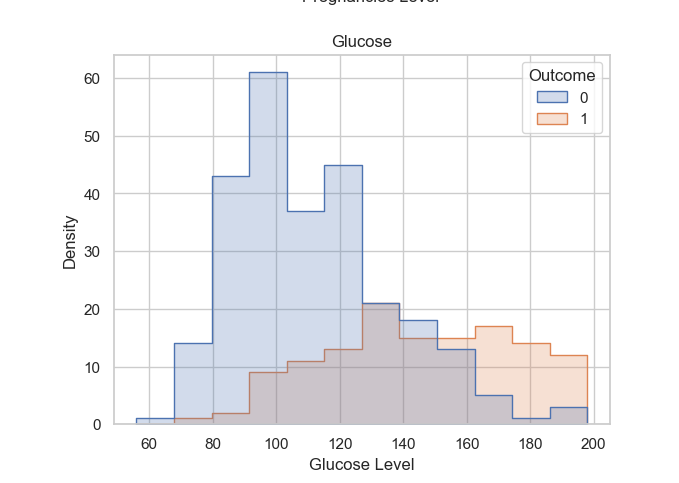
'BloodPressure' are normally distributed increasing blood pressure decreases the relative count of 0 outcomes
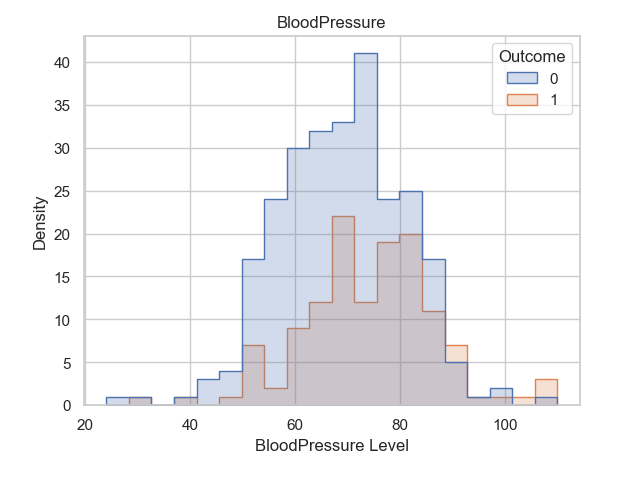
'SkinThickness' is normally distributed for 1 outcome and slightly less skewed for zero outcome Increasing skin thickness greatly Decreases The relative count of 0 outcomes
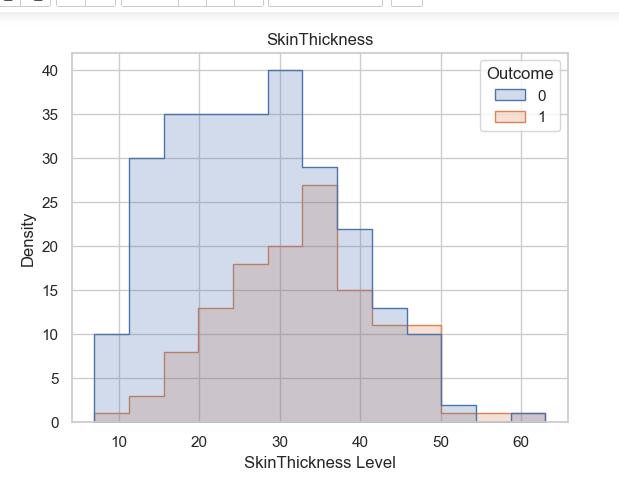
'Insulin' Is left skewed, increasing insulin decreases the relative count of 0 outcomes
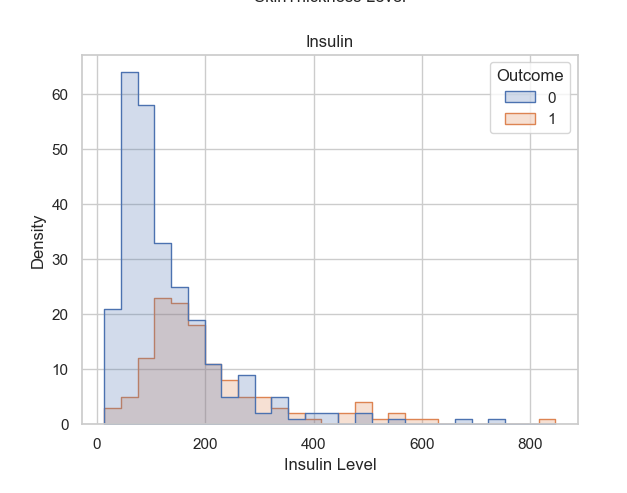
'BMI'

Is normally distributed and like above examples increasing BMI greatly decreases the relative count of zero outcomes
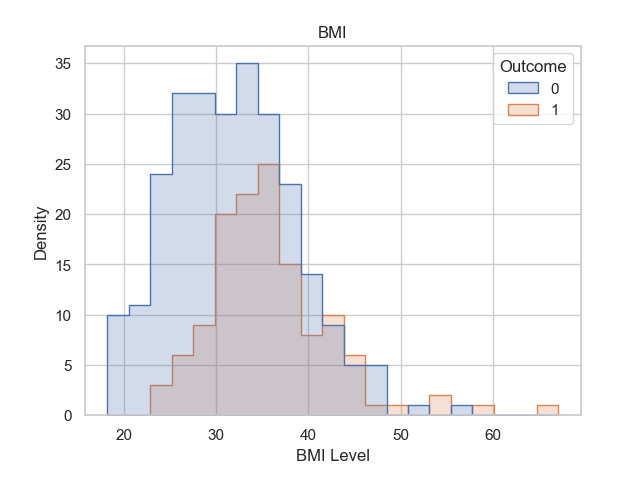
'DiabetesPedigreeFunction' His left skewed and like above examples increasing diabetes Pedigree function decreases the relevant count of zero outcomes
 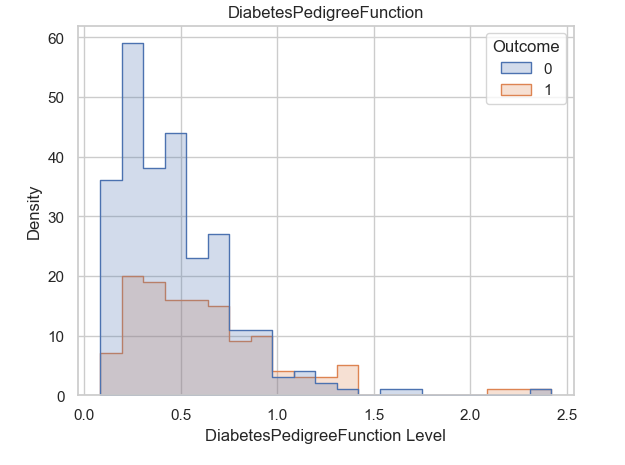
'Age' Is left skewed and like the above examples increasing age decreases the relevant count of zero outcomes
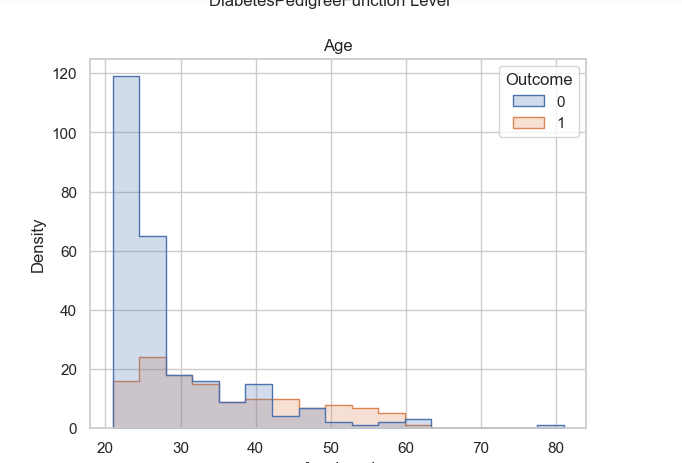

# Conclusion
observations should be re-sampled when modelling so that 0 outcomes are not over-represented and obscure relationships

# What is the average age of the individuals in the dataset?

In [141]:
for col in X_col_names:
    print(df[[col,'Outcome']].groupby('Outcome').describe())

        Pregnancies                                               
              count      mean       std  min   25%  50%  75%   max
Outcome                                                           
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0
        Glucose                                                        
          count        mean        std  min    25%    50%    75%    max
Outcome                                                                
0         500.0  109.980000  26.141200  0.0   93.0  107.0  125.0  197.0
1         268.0  141.257463  31.939622  0.0  119.0  140.0  167.0  199.0
        BloodPressure                                                    
                count       mean        std  min   25%   50%   75%    max
Outcome                                                                  
0               500.0  68.184000  18.063075  0.0  62.0  70.0  78.0  122.0
1        

In [151]:
for col in X_col_names:
    print(full_df[[col,'Outcome']].groupby('Outcome').describe())

        Pregnancies                                              
              count      mean       std  min  25%  50%  75%   max
Outcome                                                          
0             262.0  2.721374  2.617844  0.0  1.0  2.0  4.0  13.0
1             130.0  4.469231  3.916153  0.0  1.0  3.0  7.0  17.0
        Glucose                                                           
          count        mean        std   min     25%    50%     75%    max
Outcome                                                                   
0         262.0  111.431298  24.642133  56.0   94.00  107.5  126.00  197.0
1         130.0  145.192308  29.839388  78.0  124.25  144.5  171.75  198.0
        BloodPressure                                                     
                count       mean        std   min   25%   50%   75%    max
Outcome                                                                   
0               262.0  68.969466  11.892841  24.0  60.0  70.0  76.0  1

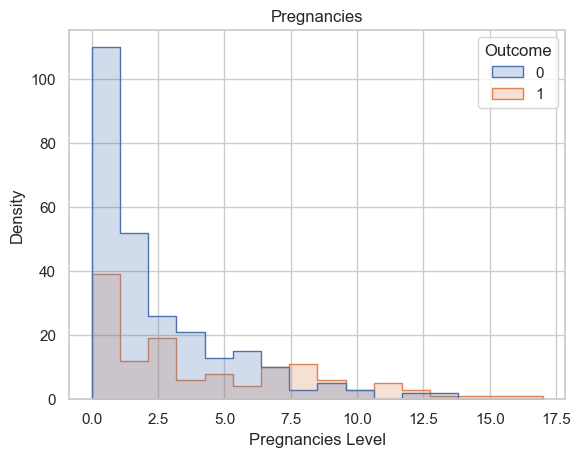

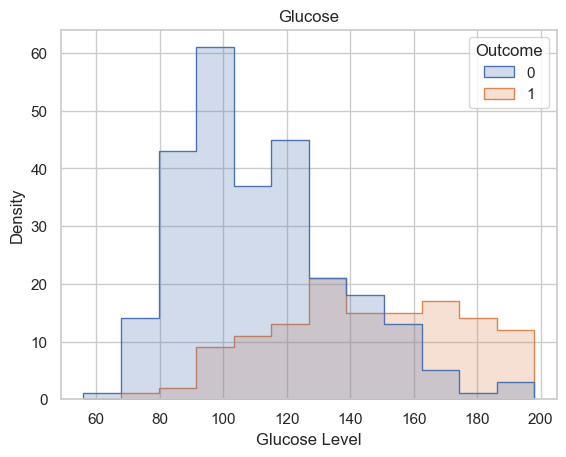

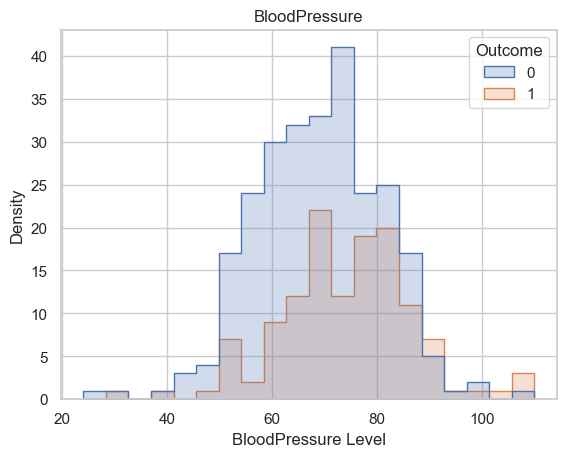

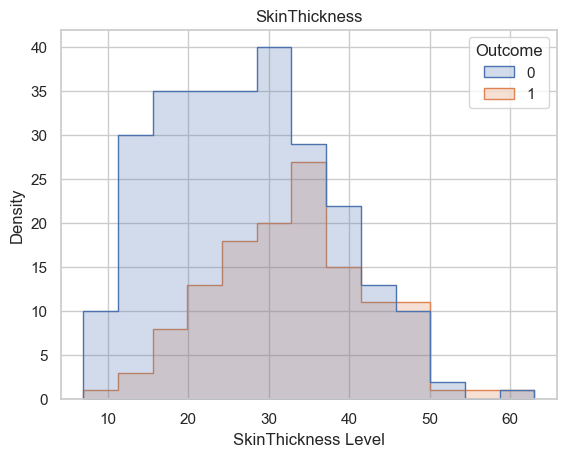

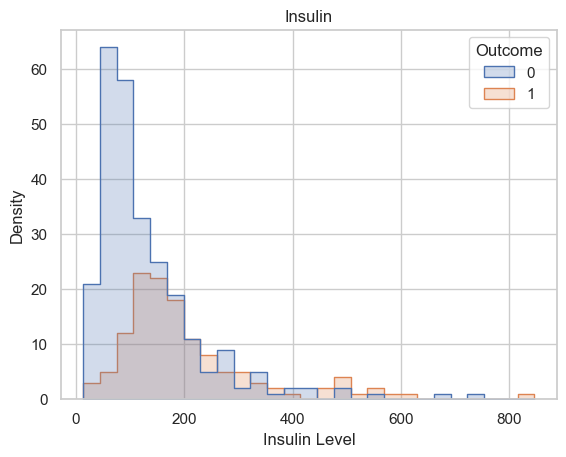

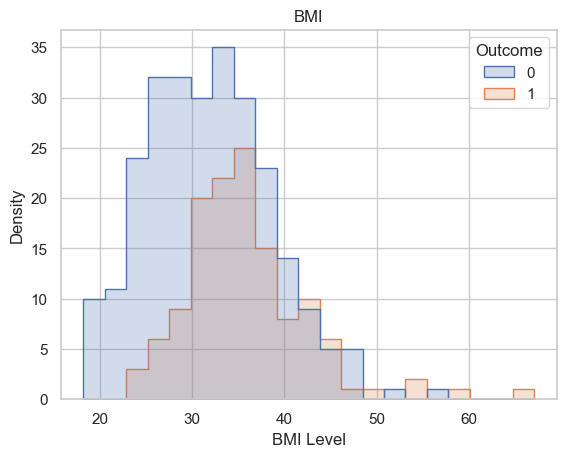

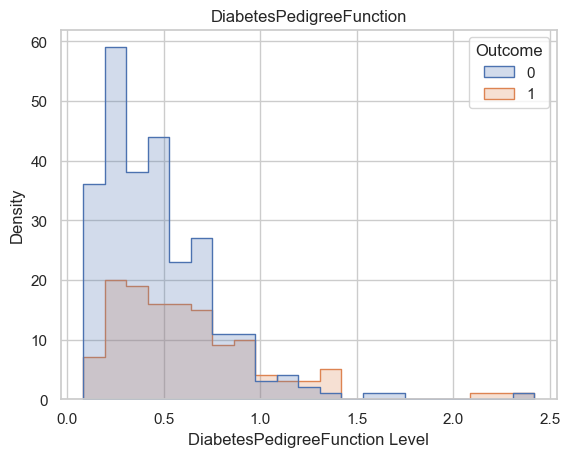

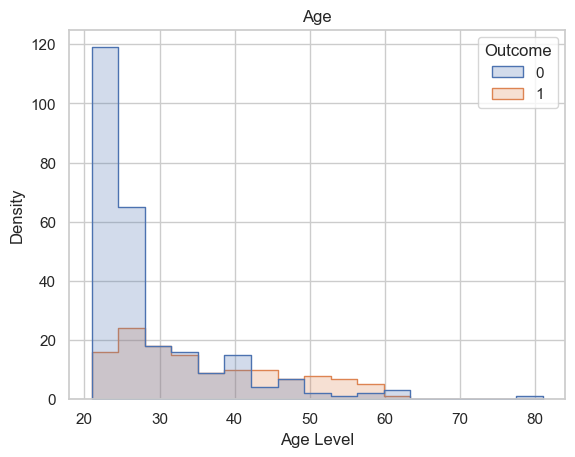

In [191]:
for col in X_col_names:

    
    sns.set(style="whitegrid")


    sns.histplot(data=full_df, x=col, hue=df['Outcome'], element='step', common_norm=False)

    # Adding labels and title
    plt.xlabel(f'{col} Level')
    plt.ylabel('Density')
    plt.title(f'{col}')

    # Display the plot
    plt.show()

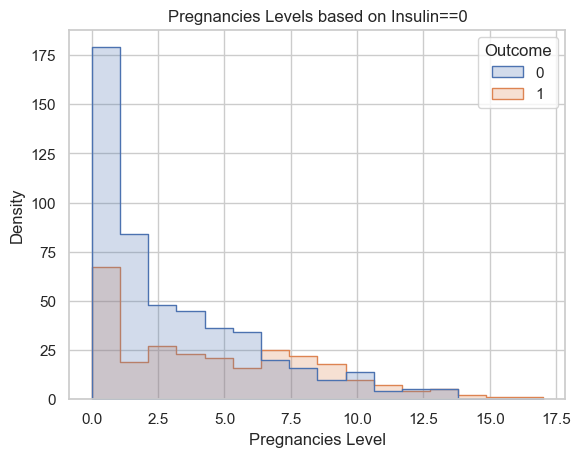

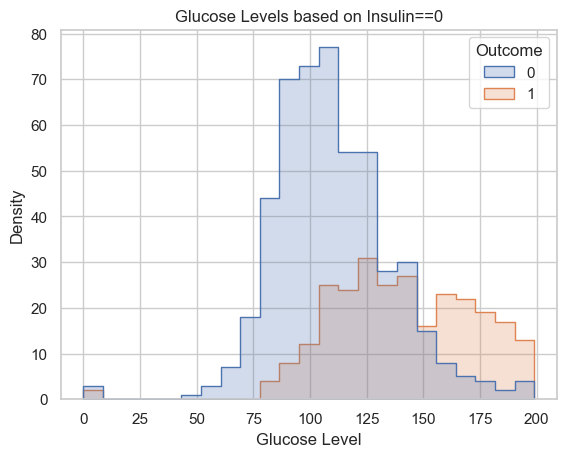

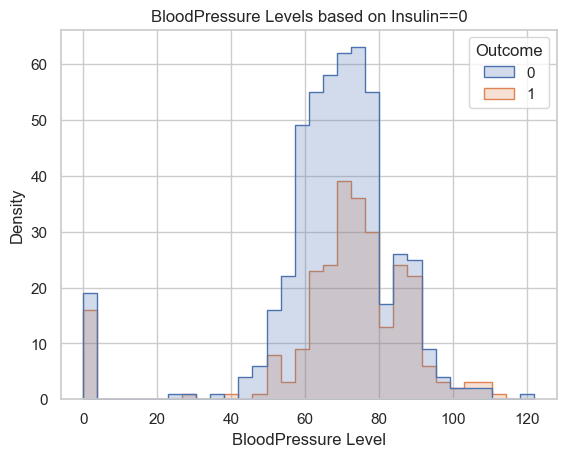

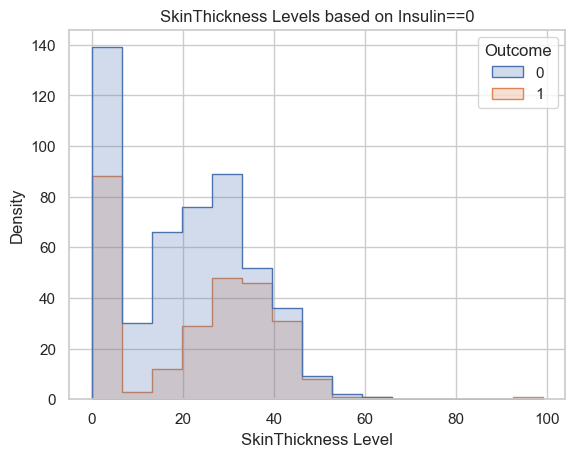

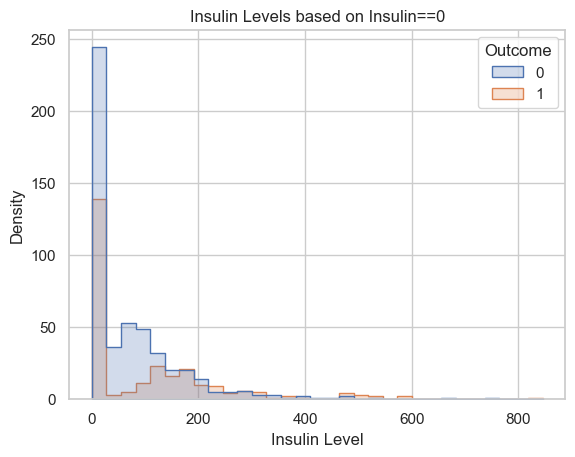

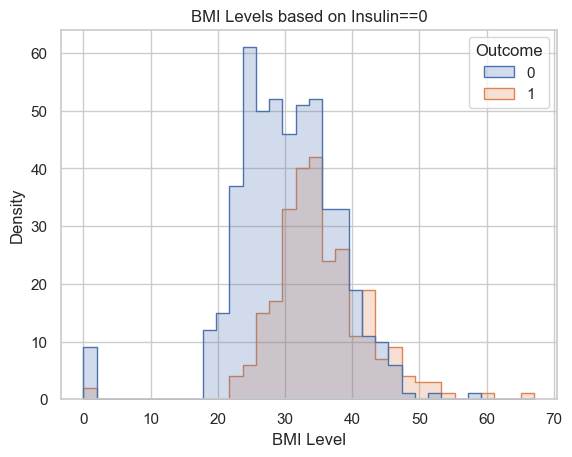

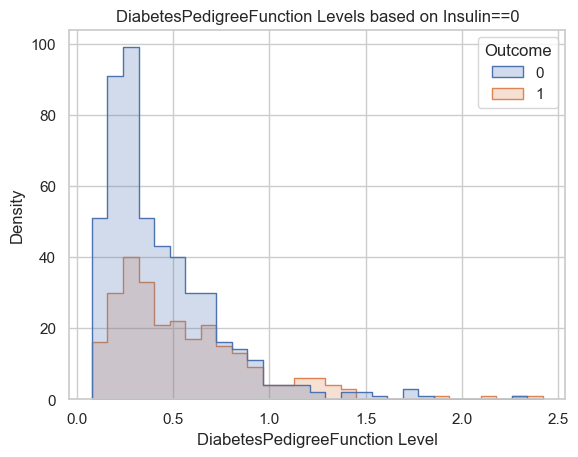

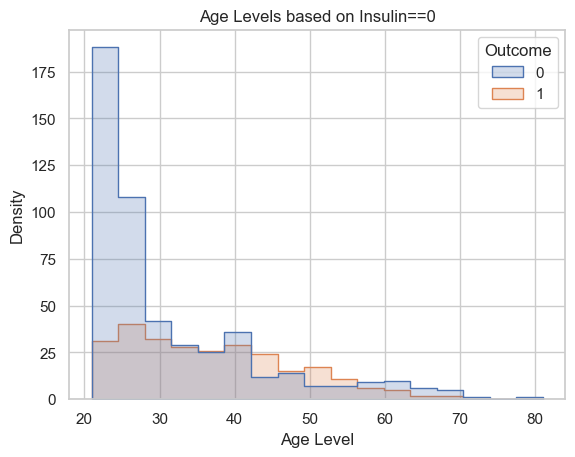

In [146]:
for col in X_col_names:

    
    sns.set(style="whitegrid")


    sns.histplot(data=df, x=col, hue=df['Outcome'], element='step', common_norm=False)

    # Adding labels and title
    plt.xlabel(f'{col} Level')
    plt.ylabel('Density')
    plt.title(f'{col} Levels based on Insulin==0')

    # Display the plot
    plt.show()

# Are there any outliers in the predictor variables?

Yes, most predictor columns have outliers

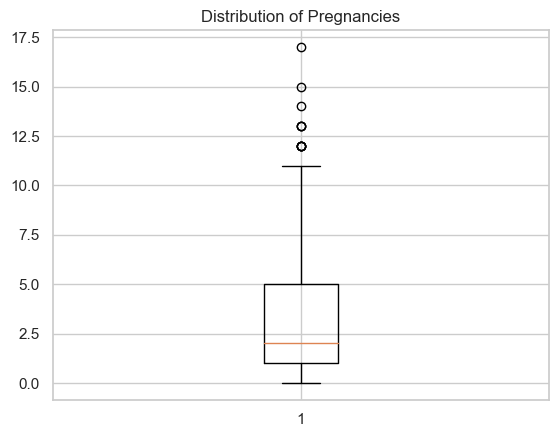

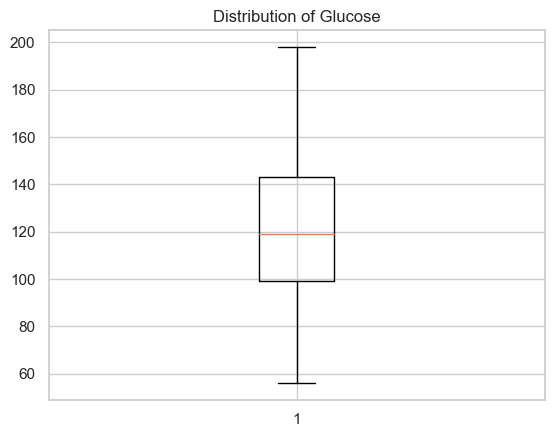

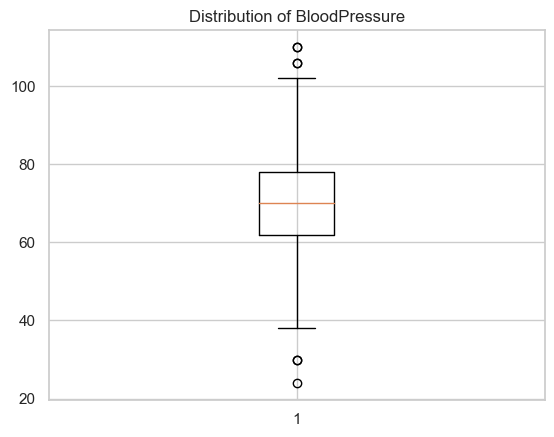

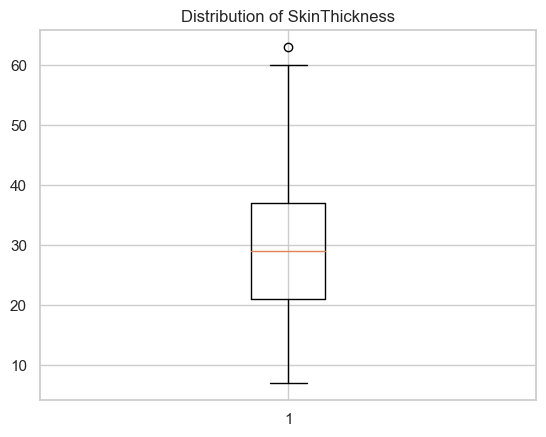

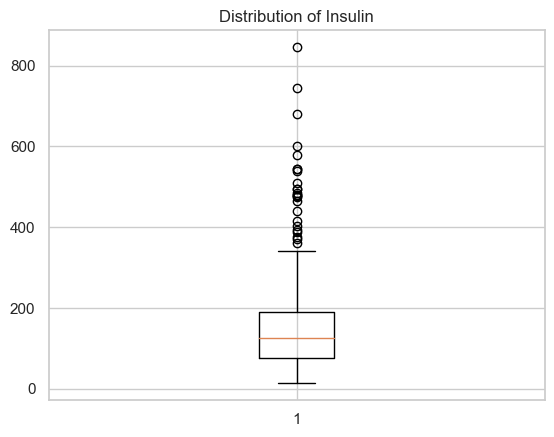

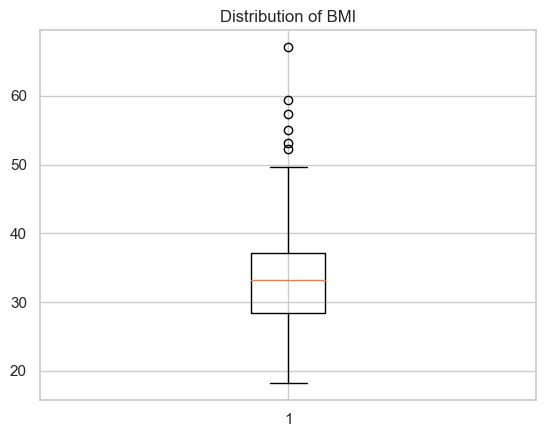

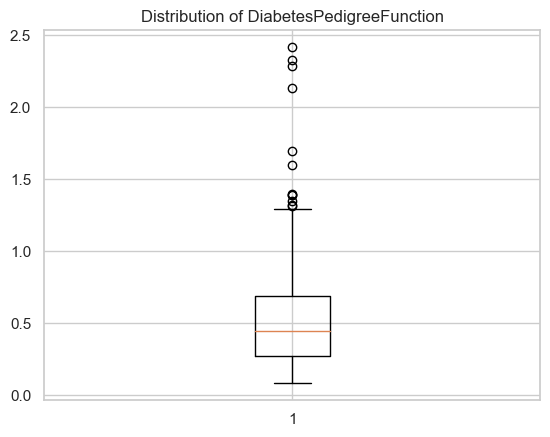

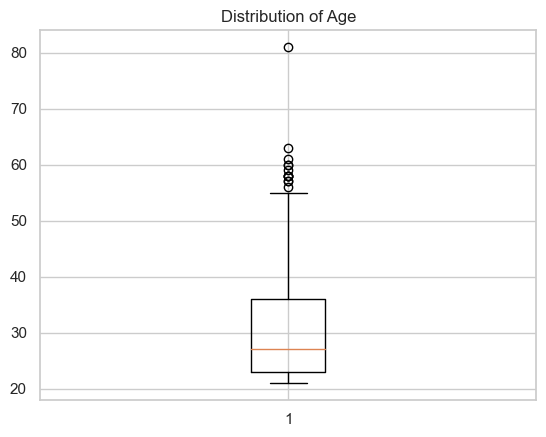

In [193]:
for col in X_col_names:
    title = f'Distribution of {col}'
    x_label = f'{col} bins'
    
    plt.boxplot(full_df[col])

    plt.title(title)
    plt.show()

# How are the predictor variables related to each other?


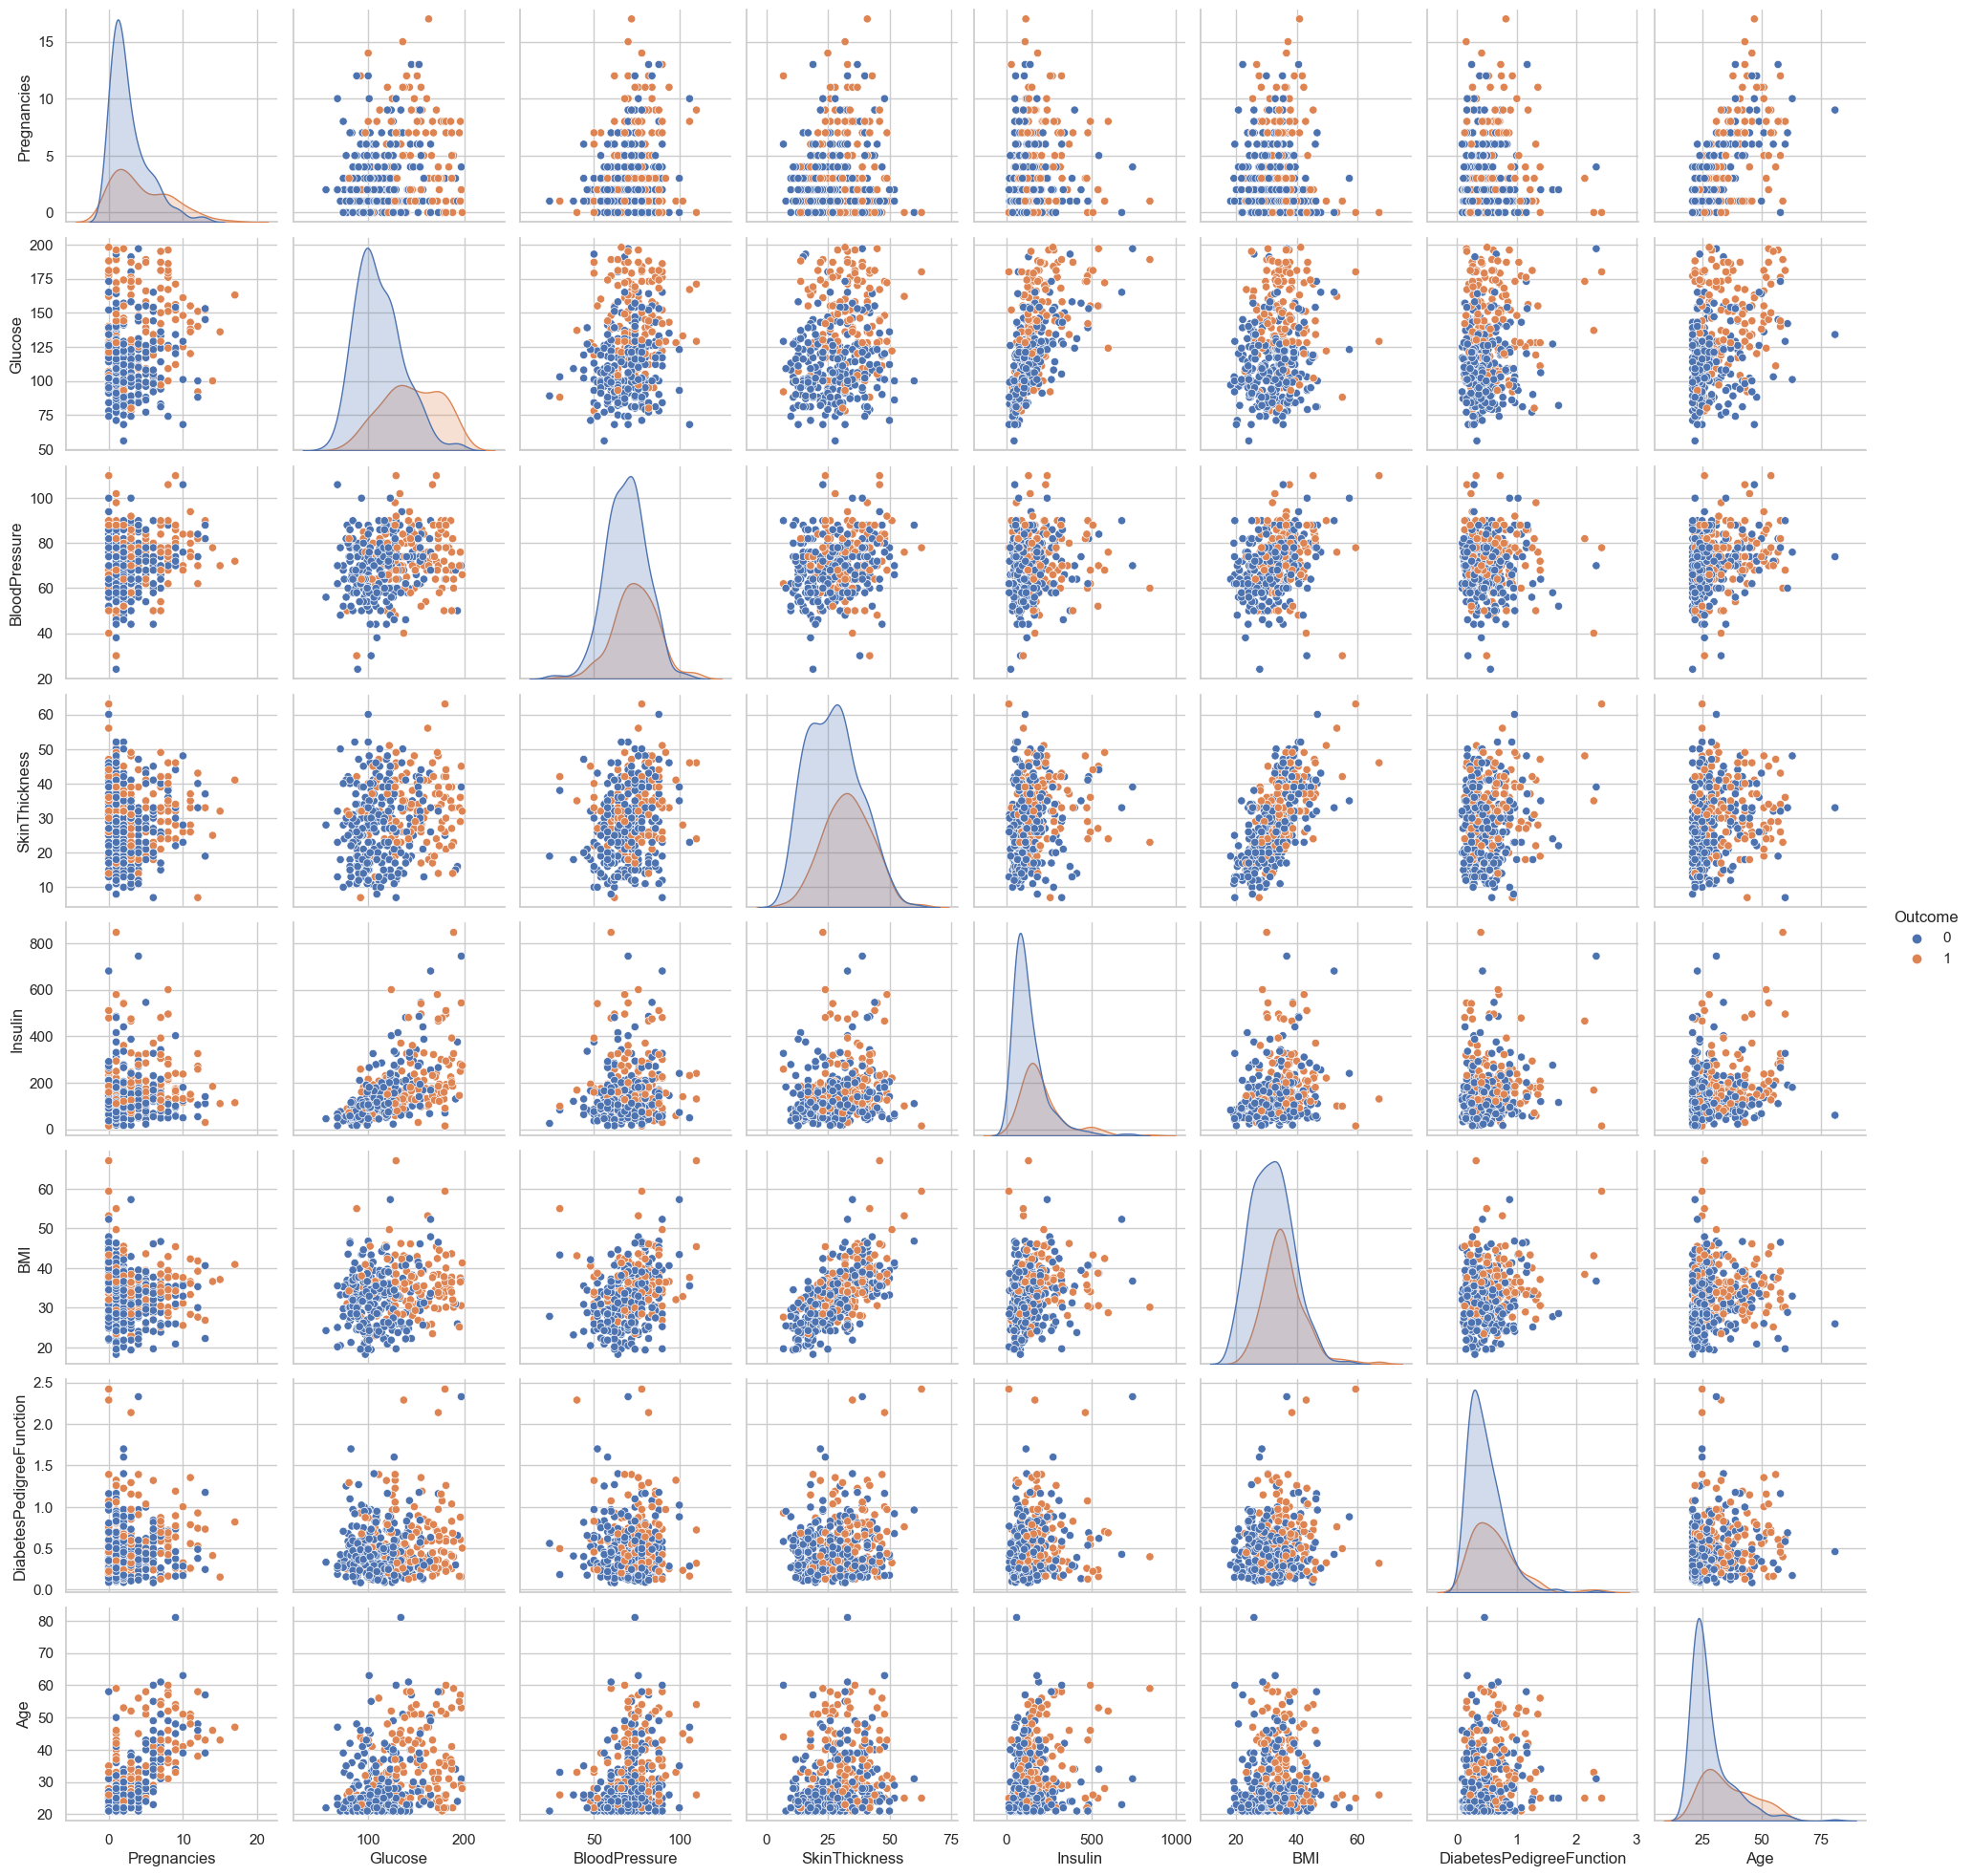

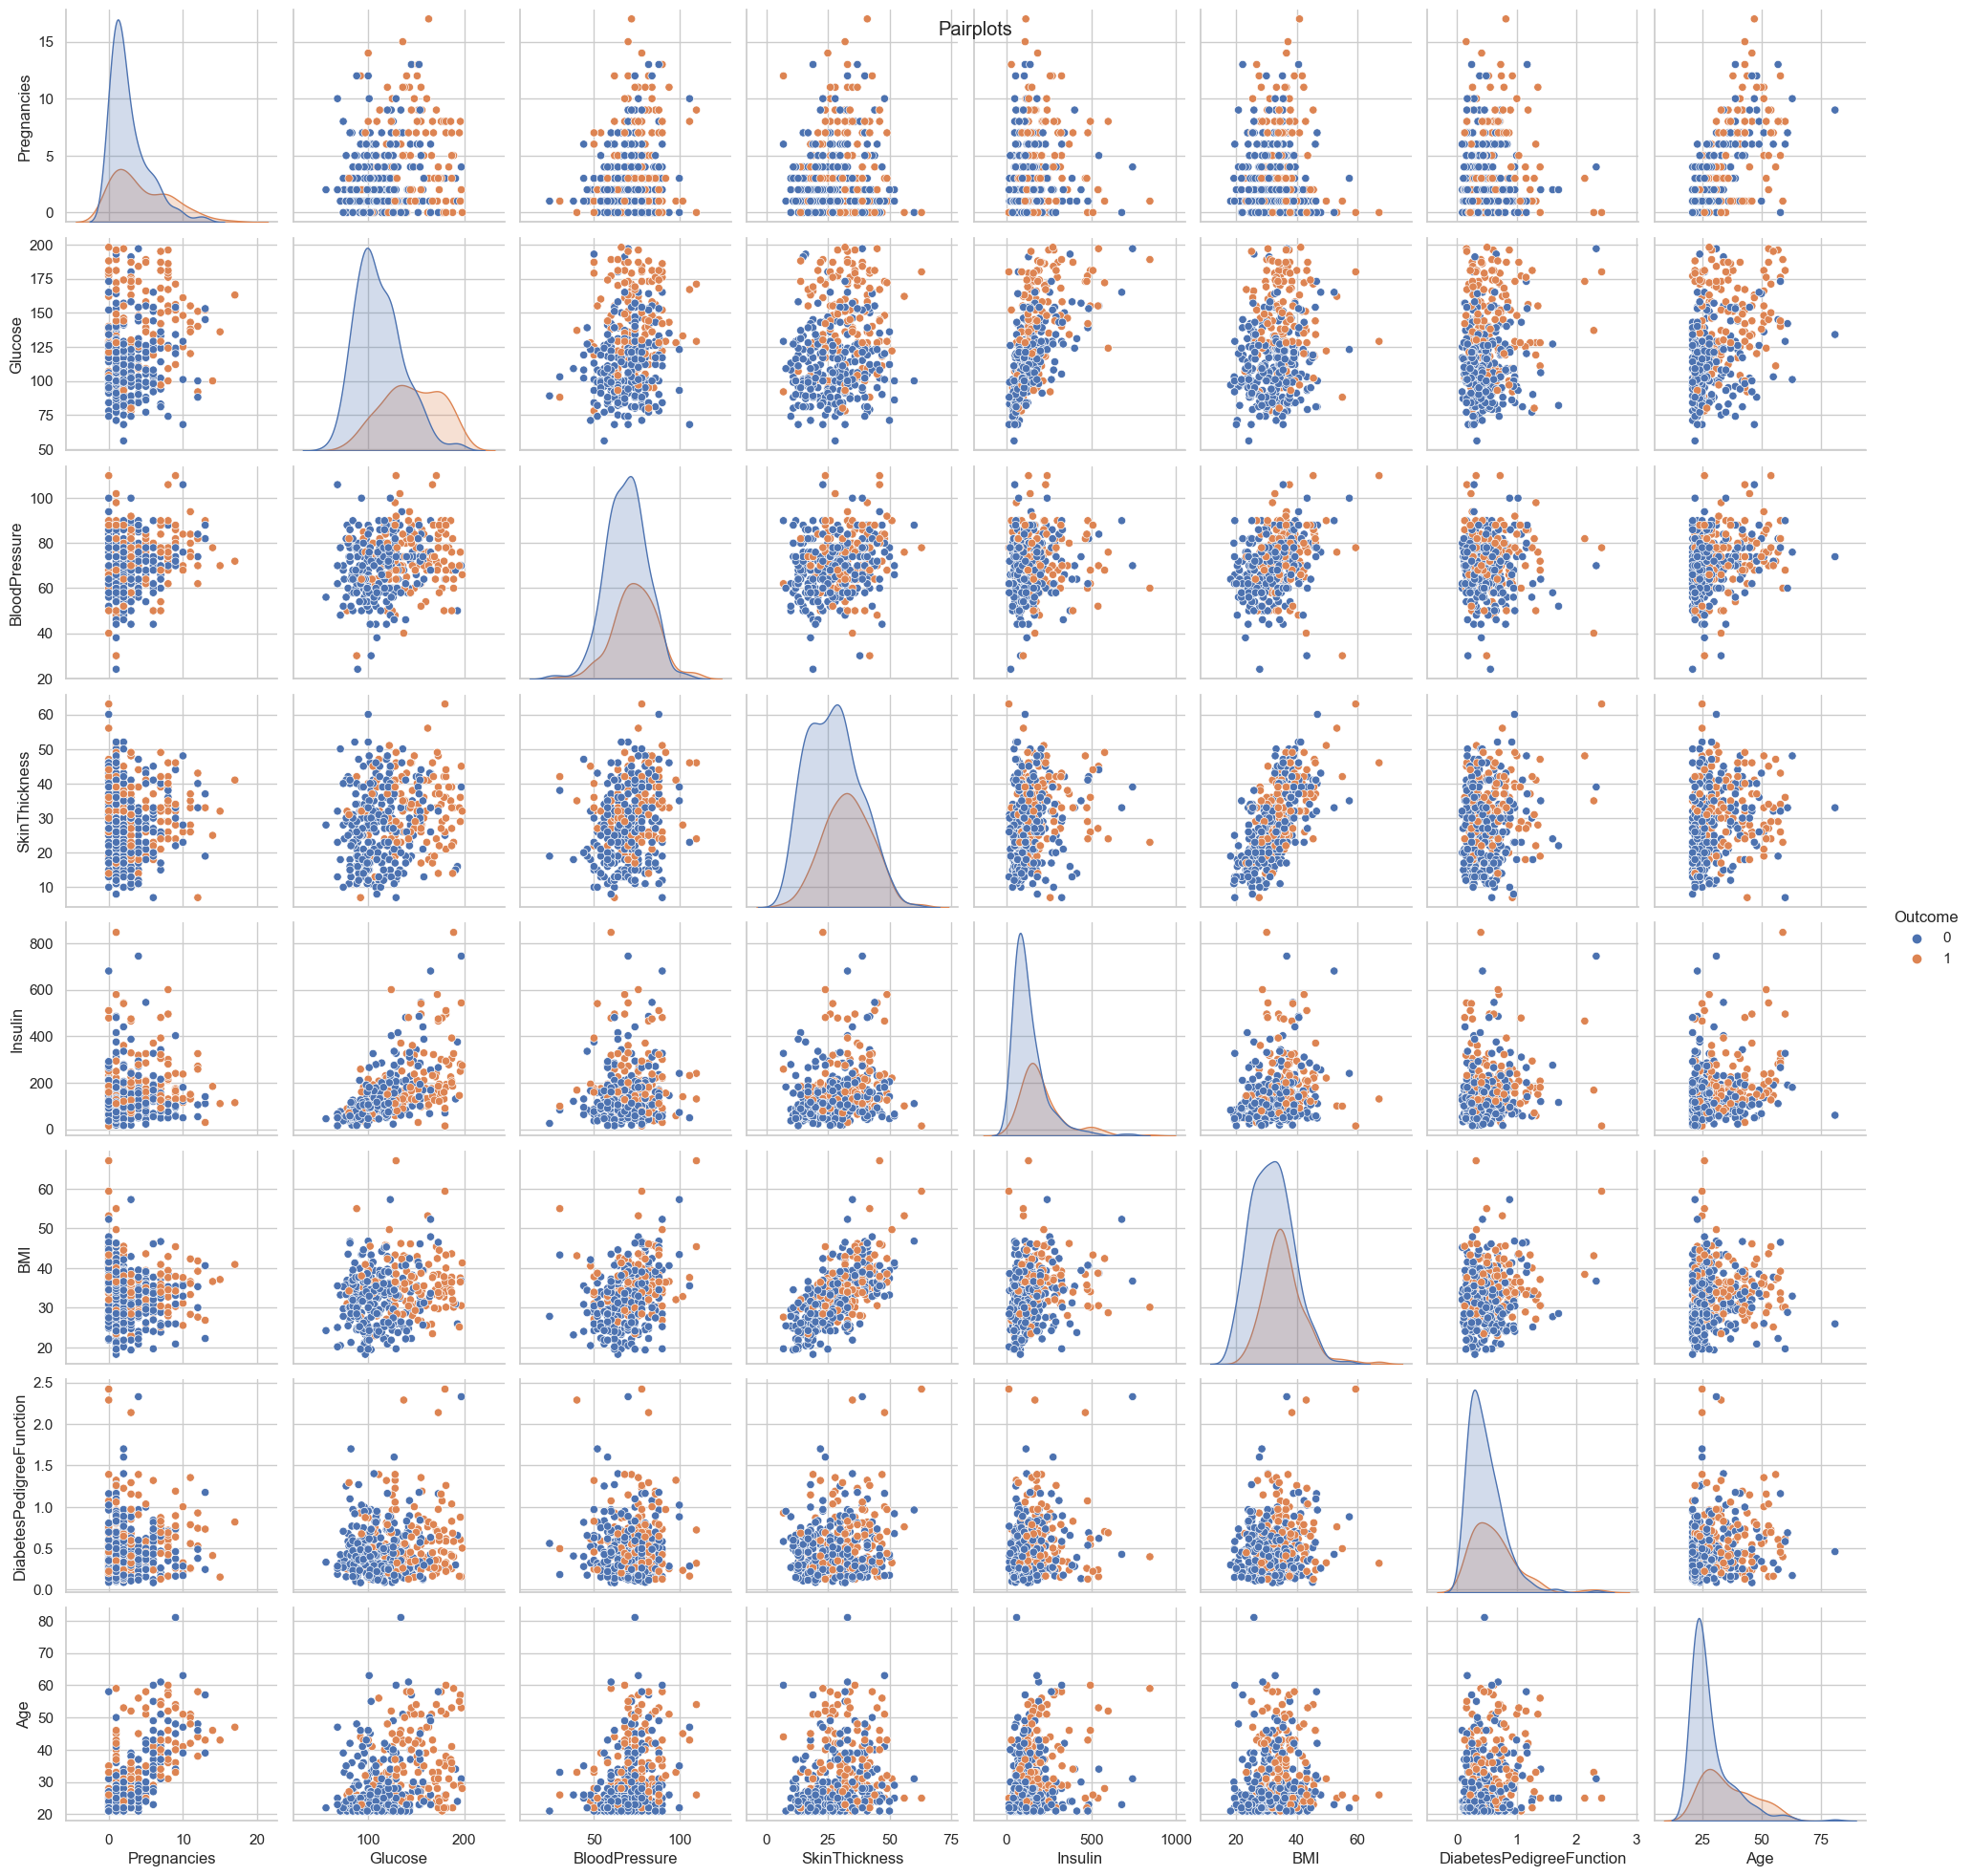

In [195]:
diab_feature_pairplt=sns.pairplot(full_df, hue='Outcome', diag_kind='kde')
sns.pairplot(full_df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplots')
plt.show()

In [196]:
diab_feature_pairplt.savefig("diab_feature_pairplt.pdf")

### Pregnancies 

- postive linear relationship to age
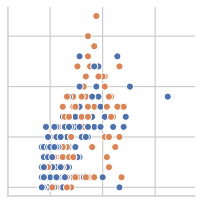


### Glucose 

- minor linear relationship between insulin and glucose
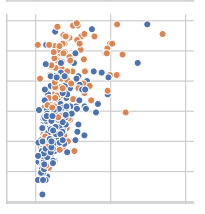



### BloodPressure 

- no obvious relationships

### SkinThickness

- BMI has a linear relationship to skin thickness, which makes sense

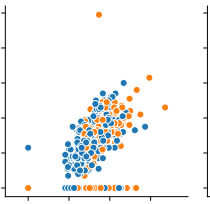

### Insulin 

- linear relationship to glucouse
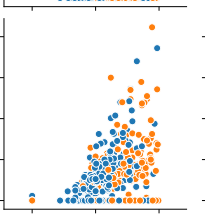



### BMI

- linear relationship to skin thickness

- less tight linear relationship

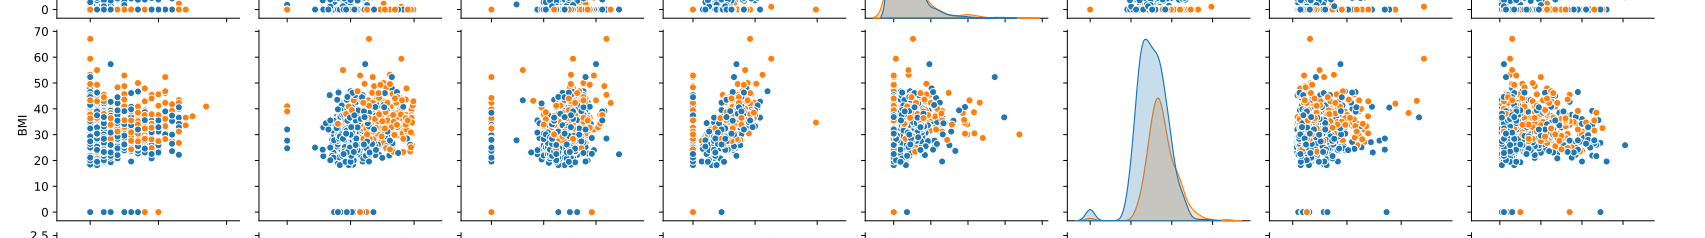





### DiabetesPedigreeFunction

- no obvious relationships seen

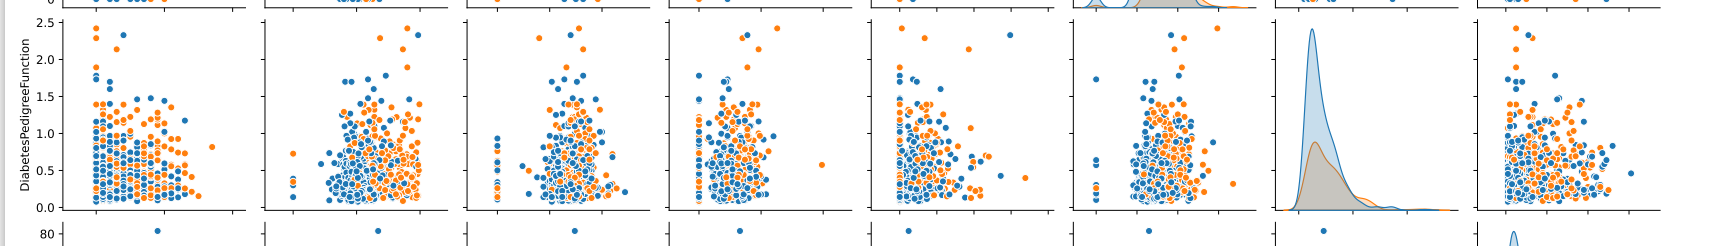

### Age
- mild relationship to pregancies, which makes sense
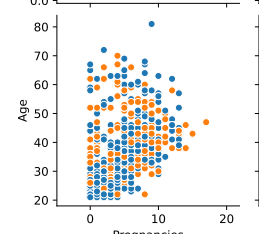
- left skewed for 0 outcome
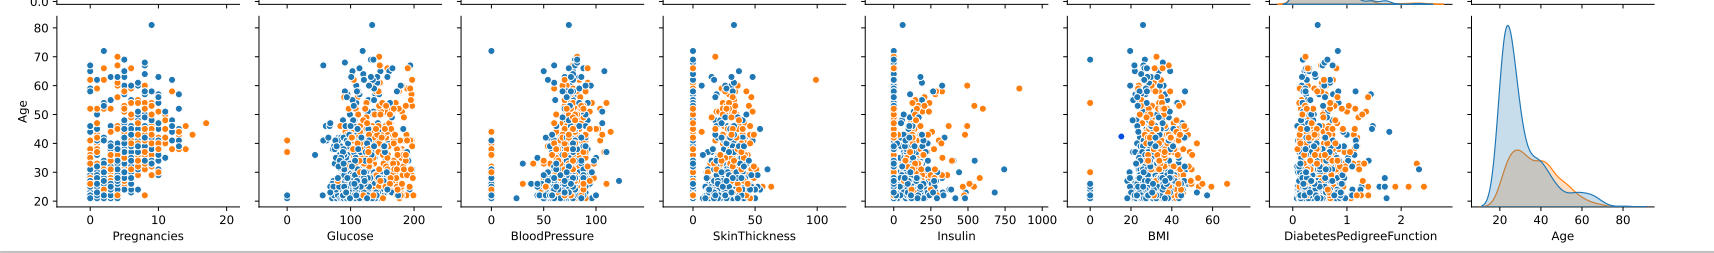

# Is there any interaction effect between the predictor variables?

Yes, there in interaction with BMI


In [239]:
overweight_df = full_df[(full_df['BMI'] > 32)]
overweight_df

for col in X_col_names:
    avg = full_df[col].mean()
    avg_overweight=overweight_df[col].mean()
    print(f'{avg:.2f} vs {avg_overweight:.2f}  {col}')

3.30 vs 3.44  Pregnancies
122.63 vs 127.34  Glucose
70.66 vs 73.34  BloodPressure
29.15 vs 34.69  SkinThickness
156.06 vs 175.13  Insulin
33.09 vs 38.01  BMI
0.52 vs 0.55  DiabetesPedigreeFunction
30.86 vs 31.69  Age


In [241]:
for col in X_col_names:
    non_overweight_values = full_df[full_df['BMI'] <= 32][col]
    overweight_values = overweight_df[col]
    
    # Performing ANOVA test
    anova_result = f_oneway(non_overweight_values, overweight_values)
    
    print(f'ANOVA Result for column "{col}":')
    print(f'F-statistic: {anova_result.statistic:.2f}')
    print(f'P-value: {anova_result.pvalue:.4f}')
    print('-' * 30)

    # Interpretation: If p-value is less than the significance level (e.g., 0.05), there is a significant difference between groups.


ANOVA Result for column "Pregnancies":
F-statistic: 0.92
P-value: 0.3392
------------------------------
ANOVA Result for column "Glucose":
F-statistic: 11.40
P-value: 0.0008
------------------------------
ANOVA Result for column "BloodPressure":
F-statistic: 23.16
P-value: 0.0000
------------------------------
ANOVA Result for column "SkinThickness":
F-statistic: 199.41
P-value: 0.0000
------------------------------
ANOVA Result for column "Insulin":
F-statistic: 12.64
P-value: 0.0004
------------------------------
ANOVA Result for column "BMI":
F-statistic: 578.69
P-value: 0.0000
------------------------------
ANOVA Result for column "DiabetesPedigreeFunction":
F-statistic: 2.52
P-value: 0.1132
------------------------------
ANOVA Result for column "Age":
F-statistic: 3.12
P-value: 0.0781
------------------------------


# What is the average age of the individuals in the dataset?

In [217]:
for col in X_col_names:
    avg = full_df[col].mean()
    print(f'Mean {col} in full_df is {avg:.2f}')


Mean Pregnancies in full_df is 3.30
Mean Glucose in full_df is 122.63
Mean BloodPressure in full_df is 70.66
Mean SkinThickness in full_df is 29.15
Mean Insulin in full_df is 156.06
Mean BMI in full_df is 33.09
Mean DiabetesPedigreeFunction in full_df is 0.52
Mean Age in full_df is 30.86


In [219]:
for col in X_col_names:
    print(full_df[[col,'Outcome']].groupby('Outcome').mean())

         Pregnancies
Outcome             
0           2.721374
1           4.469231
            Glucose
Outcome            
0        111.431298
1        145.192308
         BloodPressure
Outcome               
0            68.969466
1            74.076923
         SkinThickness
Outcome               
0            27.251908
1            32.961538
            Insulin
Outcome            
0        130.854962
1        206.846154
               BMI
Outcome           
0        31.750763
1        35.777692
         DiabetesPedigreeFunction
Outcome                          
0                        0.472168
1                        0.625585
               Age
Outcome           
0        28.347328
1        35.938462


# All cleaning actions on DF are below

In [251]:
full_df = df[df['Glucose'] != 0]
full_df = full_df[full_df['BloodPressure'] != 0]
full_df = full_df[full_df['SkinThickness'] != 0]
full_df = full_df[full_df['BMI'] != 0]
full_df = full_df[full_df['Age'] != 0]
full_df = full_df[full_df['Insulin'] != 0]
yes_preg = full_df[full_df['Pregnancies'] != 0]

In [257]:
full_df.to_csv('full_df')

In [53]:
df.shape

(768, 9)

In [155]:
full_df.shape

(392, 9)

In [252]:
yes_preg.Outcome.value_counts()

0    225
1    111
Name: Outcome, dtype: int64

In [253]:
# Example: Pairplot for multiple variables

